# Read CSV File

In [26]:
import pandas as pd
import numpy as np
from statistics import mode
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head(10)

,Age,Sex,Chestpaintype,BP,Cholesterol,FBSover120,EKGresults,MaxHR,Exerciseangina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium,HeartDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [ ]:
pip install gradio

# Processing-Data

In [27]:
#Drop cloumn Patient Id
df.drop(df.columns[0], axis=1, inplace=True)
df.replace(to_replace="Presence",
           value="1",inplace=True)
df.replace(to_replace="Absence",
           value="0",inplace=True)
df.head(10)

,Sex,Chestpaintype,BP,Cholesterol,FBSover120,EKGresults,MaxHR,Exerciseangina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium,HeartDisease
0,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,0,4,150,407,0,2,154,0,4.0,2,3,7,1


# Select input

In [28]:
X=df[["Sex","Chestpaintype","BP","Cholesterol","FBSover120","EKGresults","MaxHR","Exerciseangina","STdepression","SlopeofST",
      "Numberofvesselsfluro","Thallium"]]
X.head()

,Sex,Chestpaintype,BP,Cholesterol,FBSover120,EKGresults,MaxHR,Exerciseangina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium
0,1,4,130,322,0,2,109,0,2.4,2,3,3
1,0,3,115,564,0,2,160,0,1.6,2,0,7
2,1,2,124,261,0,0,141,0,0.3,1,0,7
3,1,4,128,263,0,0,105,1,0.2,2,1,7
4,0,2,120,269,0,2,121,1,0.2,1,1,3


# Select output

In [29]:
Y=df[['HeartDisease']]
Y.head()

,HeartDisease
0,1
1,0
2,1
3,0
4,0


# Classes Distribution

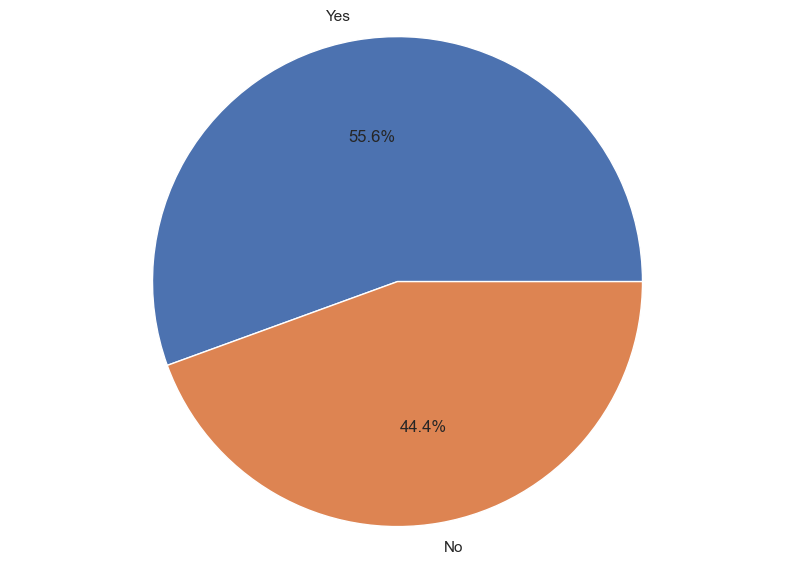

In [30]:
class_counts = Y.groupby('HeartDisease').size()
class_counts.head()
label = ['Yes', 'No']
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(class_counts, labels = label, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
# show plot
plt.show()

# Classes Distribution after over sampling

Counter({0: 700, 1: 300})
Counter({1: 700, 0: 700})
[1 0 0 ... 1 1 1]


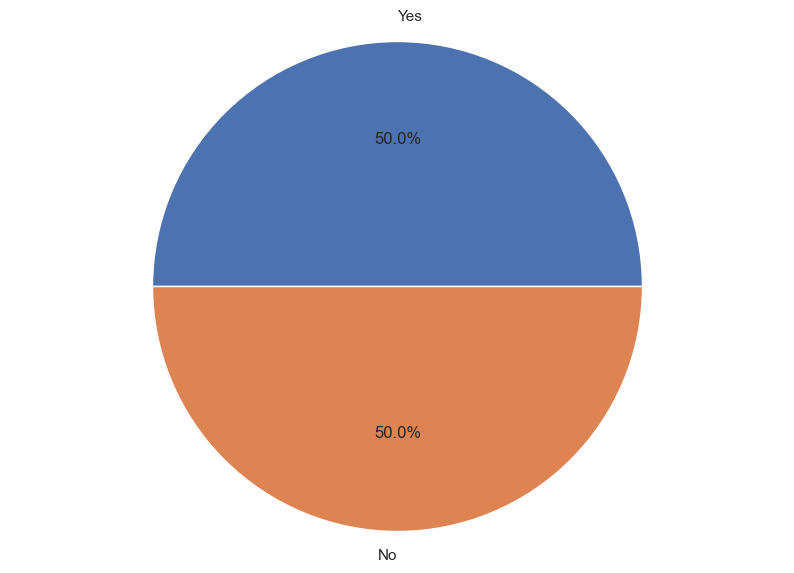

In [31]:
from imblearn.over_sampling import SMOTE
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from numpy import where
# define dataset
X_in, Y_in = make_classification(n_samples=1000, n_features=12, n_redundant=0,n_classes=2,
	n_clusters_per_class=2, weights=[0.7], flip_y=0, random_state=42)
# summarize class distribution
counter = Counter(Y_in)
print(counter)
# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X_in, Y_in)
# summarize the new class distribution
counter = Counter(Y)
print(counter)
print(Y)
label = ['Yes', 'No']
data=['1400','1400']
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels =label, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
# show plot
plt.show()

# Test and train data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)

# select models and train

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
LogReg = LogisticRegression(solver='lbfgs', max_iter=200)
dt=tree.DecisionTreeClassifier(criterion="entropy")
svc = SVC(probability=True)
for clf in (LogReg, knn, dt,svc):
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_train)

# Evaluation models:

# Evaluation Logistic Regression

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred=LogReg.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred,pos_label=0))
print('Recall: %.3f' % recall_score(y_test, y_pred,pos_label=0))
print('F1: %.3f' % f1_score(y_test, y_pred,pos_label=0))

Accuracy: 0.889
Precision: 0.897
Recall: 0.878
F1: 0.887


# Confusion matrix for Logistic Regression 

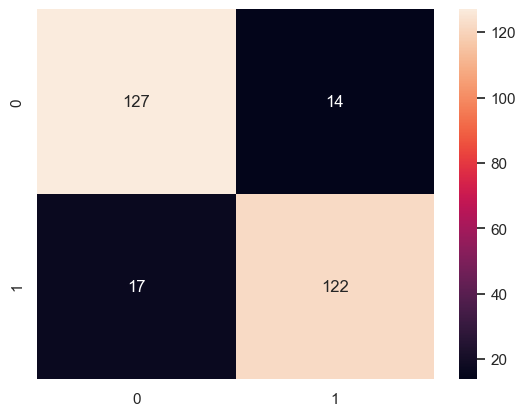

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set_theme()
uniform_data = confusion_matrix(y_test, y_pred, labels=[1, 0])
ax = sns.heatmap(uniform_data,annot=True, fmt='g')

# ROC and AUC for Logistic Regression

AUC: 0.948


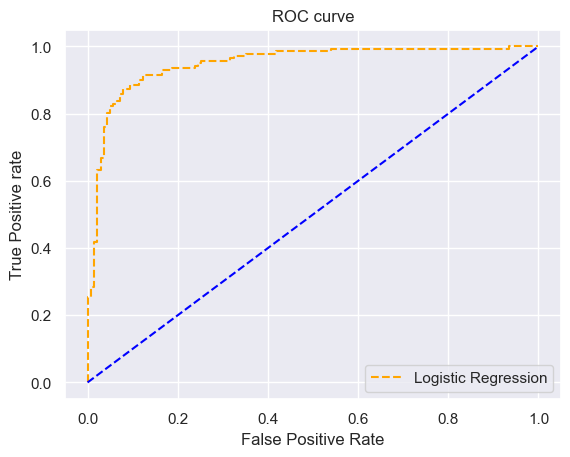

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
pred_prob = LogReg.predict_proba(X_test)
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC: %.3f' %auc_score)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Evaluation Decision Tree

In [37]:
y_pred=dt.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred,pos_label=1))
print('Recall: %.3f' % recall_score(y_test, y_pred,pos_label=1))
print('F1: %.3f' % f1_score(y_test, y_pred,pos_label=1))

Accuracy: 0.911
Precision: 0.887
Recall: 0.943
F1: 0.914


# Confusion matrix for Decision Tree

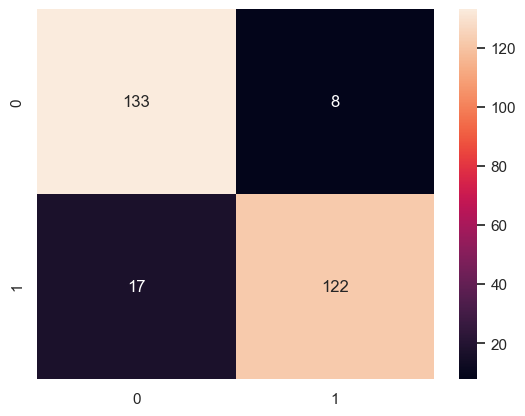

In [38]:
confusion_matrix(y_test, y_pred)
uniform_data = confusion_matrix(y_test, y_pred, labels=[1, 0])
ax = sns.heatmap(uniform_data,annot=True, fmt='g')

# ROC and AUC for Decision Tree

AUC: 0.910


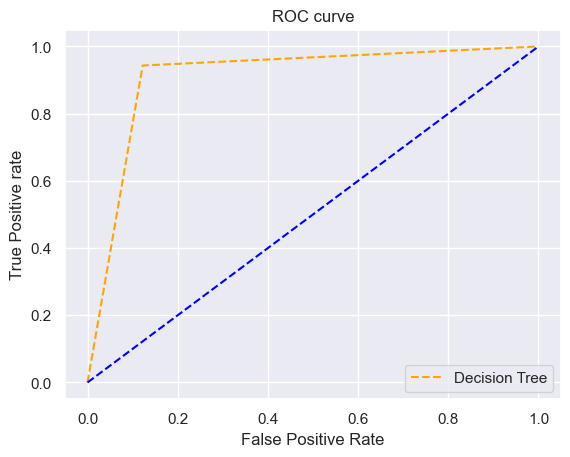

In [39]:
pred_prob = dt.predict_proba(X_test)
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC: %.3f' %auc_score)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Evaluation svc

In [40]:
y_pred=svc.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred,pos_label=1))
print('Recall: %.3f' % recall_score(y_test, y_pred,pos_label=1))
print('F1: %.3f' % f1_score(y_test, y_pred,pos_label=1))

Accuracy: 0.907
Precision: 0.908
Recall: 0.908
F1: 0.908


# Confusion matrix for svc 

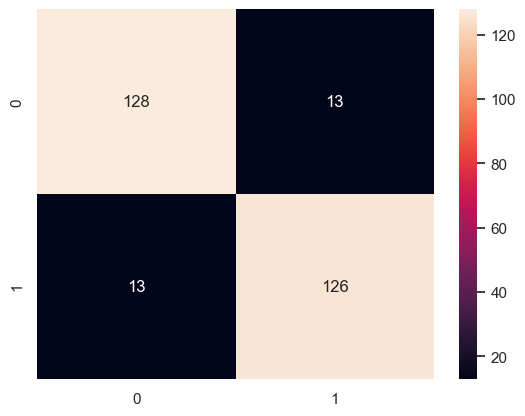

In [41]:
confusion_matrix(y_test, y_pred)
uniform_data = confusion_matrix(y_test, y_pred, labels=[1, 0])
ax = sns.heatmap(uniform_data,annot=True, fmt='g')

# ROC and AUC for svc

AUC: 0.940


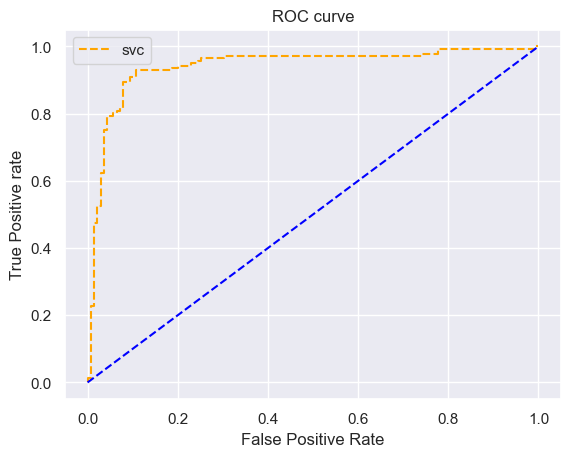

In [42]:
pred_prob = svc.predict_proba(X_test)
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC: %.3f' %auc_score)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='svc')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Evaluation knn

In [43]:
y_pred=knn.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred,pos_label=1))
print('Recall: %.3f' % recall_score(y_test, y_pred,pos_label=1))
print('F1: %.3f' % f1_score(y_test, y_pred,pos_label=1))

Accuracy: 0.879
Precision: 0.824
Recall: 0.965
F1: 0.889


# Confusion matrix for knn 

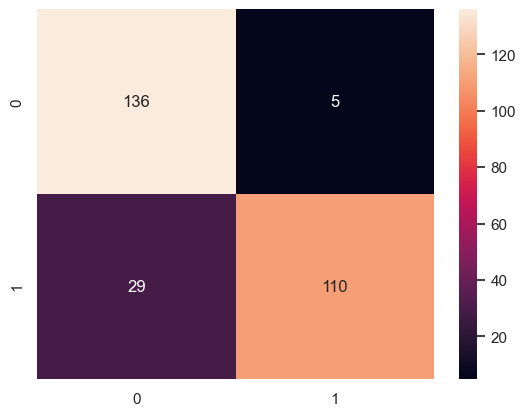

In [44]:
confusion_matrix(y_test, y_pred)
uniform_data = confusion_matrix(y_test, y_pred, labels=[1, 0])
ax = sns.heatmap(uniform_data,annot=True, fmt='g')

# ROC and AUC for knn

AUC: 0.937


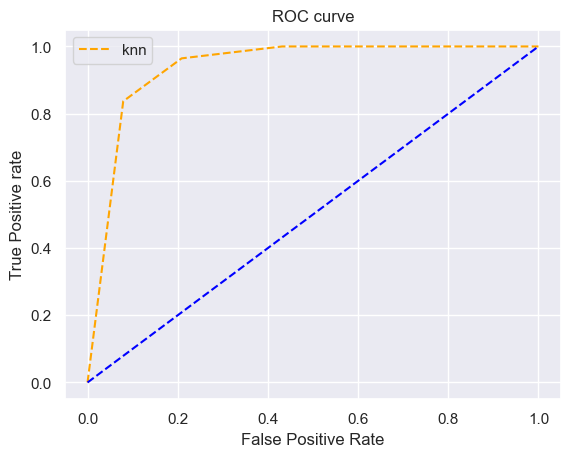

In [45]:
pred_prob = knn.predict_proba(X_test)
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC: %.3f' %auc_score)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='knn')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Save and test models

In [46]:
import pickle
LogReg_model = 'LogReg_model.sav'
pickle.dump(LogReg, open(LogReg_model, 'wb'))
DecisionTree_model = 'DecisionTree_model.sav'
pickle.dump(dt, open(DecisionTree_model, 'wb'))
svc_model = 'svc_model.sav'
pickle.dump(svc, open(svc_model, 'wb'))
knn_model = 'knn_model.sav'
pickle.dump(knn, open(knn_model, 'wb'))

# Function for test models

In [47]:
def predictResult(z, model):
    loaded_model = pickle.load(open(model,'rb'))
    result = loaded_model.predict(z)
    if result==0:
        return ("No")
    if result==1:
        return ("Yes")

# Call GUI

In [49]:
import gradio as gr

def moduls(moduls_input,Sex,Chestpaintype,BP,Cholesterol,FBSover120,EKGresults,MaxHR,Exerciseangina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium):
    with open(moduls_input.strip()+'_model.sav', "rb") as f:
        clf  = pickle.load(f)
        preds = clf.predict([[Sex,Chestpaintype,BP,Cholesterol,FBSover120,EKGresults,MaxHR,Exerciseangina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium]])
    if preds == 1:
            return "You have symptoms of Heart Disease"
    return "You do not have symptoms of Heart Disease"

#Create the input component for Gradio since we are expecting 4 inputs
moduls_input=gr.Textbox(label="Enter Models Name: knn or SVC or LogReg or DecisionTree")
Gender_input = gr.Number(label = "Enter 1 For Male or 2 For Female")
Chest_pain_type_input=gr.Slider(1,4,label="Enter Chest pain type")
BP_input=gr.Slider(1,200,label="Enter BP Rate")
Cholesterol_input=gr.Slider(1,500,label="Enter Cholesterol Rate")
FBS_over_120_input=gr.Number(label="Enter FBS over 120 enter 0 or 1")
EKG_results_input=gr.Slider(0,2,label="Enter EKG results Rate")
Max_HR_input=gr.Slider(1,200,label="Enter Max HR Rate")
Exercise_angina_input = gr.Number(label = "Enter 0  or 1")
ST_depression_input=gr.Slider(1,10,label="Enter ST depression Rate")
Slope_of_ST_input = gr.Number(label = "Enter 1  or 2")
Number_of_vessels_fluro_input = gr.Number(label = "Enter 0  or 2 or 3")
Thallium_input=gr.Slider(1,10,label="Enter Thallium Rate")

# We create the output
output = gr.Textbox()


app = gr.Interface(fn = moduls,inputs=[moduls_input,Gender_input,Chest_pain_type_input, BP_input, Cholesterol_input, FBS_over_120_input, EKG_results_input, Max_HR_input, Exercise_angina_input, ST_depression_input, Slope_of_ST_input, Number_of_vessels_fluro_input, Thallium_input], outputs=output)
app.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
